In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pySIVAK import pySIVAK
import pySIVAK_plots as plots

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import json
import logging

# Read data

In [4]:
inputdir = Path(r'..\results')
settingsdir = Path('Invoer')


In [5]:
with open(settingsdir / 'settings.json') as f:
      settings = json.load(f)
        
water_plane = settings['water_plane']
dH = settings['dH']
max_pomp_inzet = settings['max_pomp_inzet']

In [6]:
with open(settingsdir / 'simulations.json') as f:
      simulations = json.load(f)


In [7]:
# Set scenario's
lock = 'Maasbracht'
# lock = 'Born'
# lock = 'Heel'

In [8]:
SIVAK_scenarios = simulations[lock]

In [9]:
S = {}

for scenario, name in SIVAK_scenarios.items():
    print(f'{scenario} - {name}')
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'
    
    if not ships_file.exists(): 
        ships_file = None

    S[name] = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)
    S[name].name = name


SLMSBR KBN 0 - Base, Area - REF
SLMSBR KBN 0 - Base, Area beroep 10up - Beroepsvaart +10%
SLMSBR KBN 0 - Base, Area beroep 20up - Beroepsvaart +20%
SLMSBR KBN 0 - Base, Area recreatie 50down - Recreatievaart -50%
SLMSBR KBN 0 - Base, Area recreatie 100down - Recreatievaart -100%
SLMSBR KBN 2 - OK BD - Oostkolk gestremd
SLMSBR KBN 3 - WK BD - Westkolk gestremd
SLMSBR KBN 4 - R 40 80 30 - R 40 80 30
SLMSBR KBN 5 - R 40 80 60 - R 40 80 60
SLMSBR KBN 6 - R 40 80 90 - R 40 80 90
SLMSBR KBN 7 - R 60 80 90 - R 60 80 90
SLMSBR KBN 8 - R 80 80 90 - R 80 80 90
SLMSBR KBN 9 - R 80 80 110 - R 80 80 110
SLMSBR KBN 0 - Base, Area H 100 100 - REF H 100 100
SLMSBR KBN 4 - R 40 80 30 H 100 100 - R 40 80 30 H 100 100
SLMSBR KBN 5 - R 40 80 60 H 100 100 - R 40 80 60 H 100 100
SLMSBR KBN 4 - R 40 80 30, beroep 10up - R 40 80 30 Beroepsvaart +10%
SLMSBR KBN 4 - R 40 80 30, beroep 20up - R 40 80 30 Beroepsvaart +20%
SLMSBR KBN 4 - R 40 80 30, recreatie 50down - R 40 80 30 Recreatievaart -50%
SLMSBR KBN 4 - 

# Data analyses

In [10]:
scenario = 'REF'

scenario = 'R 60 80 90'

In [11]:
outputdir = Path('Simulation_results_notebook') / lock / scenario
outputdir.mkdir(exist_ok=True, parents=True)

plots.plot_and_save_all(S[scenario], outputdir=outputdir)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [12]:
# S[scenario].transit_times.head().T

In [13]:
# S[scenario].levelings.head().T

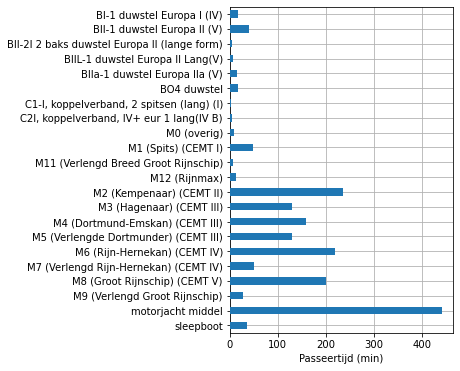

In [14]:
plotdata = S[scenario].transit_times.groupby('Class')['Passage time [hours]'].count()
plotdata.plot.barh(figsize=(4, 6), zorder=3)
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()

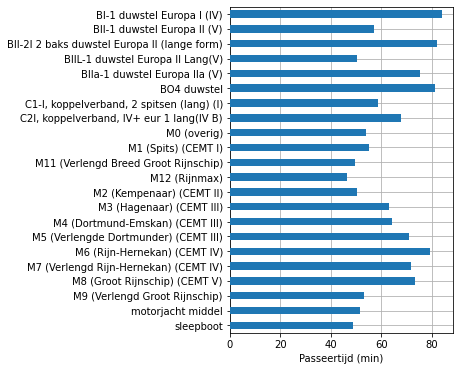

In [15]:
# Difference in ship type
plotdata = S[scenario].transit_times.groupby('Class')['Passage time [hours]'].mean() * 60
plotdata.plot.barh(figsize=(4, 6), zorder=3)
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()

plt.savefig(    outputdir / 'Passeertijd_scheepstype.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_scheepstype.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_scheepstype.csv')

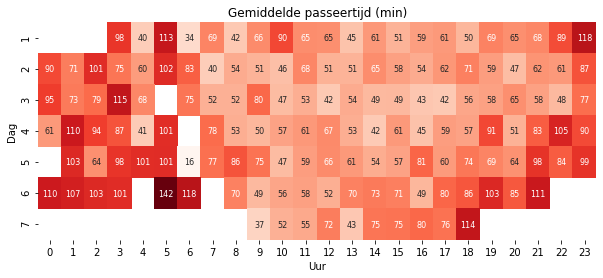

In [16]:
# Difference in weekday
plotdata = S[scenario].passage_time_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Reds', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Gemiddelde passeertijd (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur.csv')

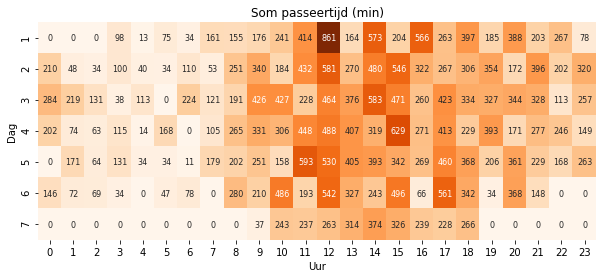

In [17]:
plotdata = S[scenario].passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Oranges', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Som passeertijd (min)')

plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd_dag_uur_som.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd_dag_uur_som.csv')

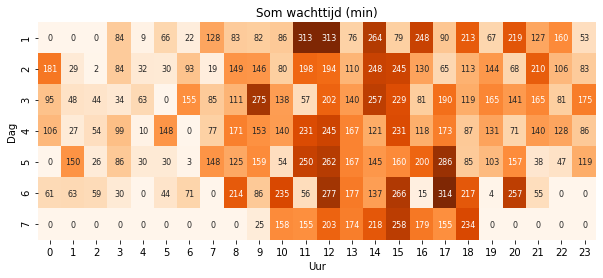

In [18]:
plotdata = S[scenario].passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Oranges', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Som wachttijd (min)')

plt.savefig(    outputdir / 'Wachttijd_dag_uur_som.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Wachttijd_dag_uur_som.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Wachttijd_dag_uur_som.csv')

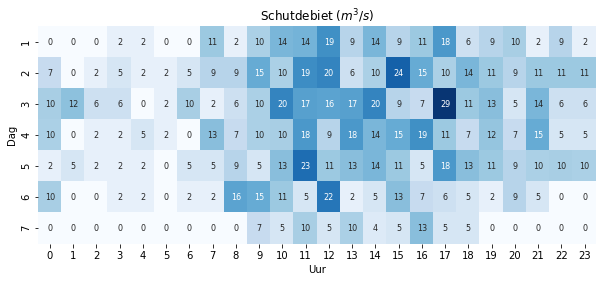

In [19]:
# Difference in weekday
plotdata = S[scenario].waterloss_per_hour_per_day()
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Blues', annot=True, fmt='.0f', annot_kws={'size': 8}, vmin=0, vmax=30)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Schutdebiet ($m^3/s$)')

plt.savefig(    outputdir / 'Schutdebiet.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schutdebiet.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schutdebiet.csv')

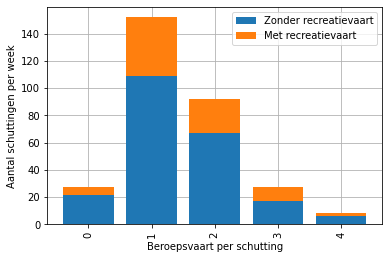

In [20]:
t = S[scenario].ships_per_leveling()

plotdata = pd.concat({
    'Zonder recreatievaart': t.iloc[:, t.columns < 1].sum(axis=1),
    'Met recreatievaart': t.iloc[:, t.columns >= 1].sum(axis=1),
}, axis=1)

plotdata = plotdata.reindex(np.arange(0, 5, 1))
plotdata.plot.bar(stacked=True, width=0.8, zorder=3)
plt.grid()
plt.xlabel('Beroepsvaart per schutting')
plt.ylabel('Aantal schuttingen per week')

plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Schuttingen_beroepsvaart.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Schuttingen_beroepsvaart.csv')

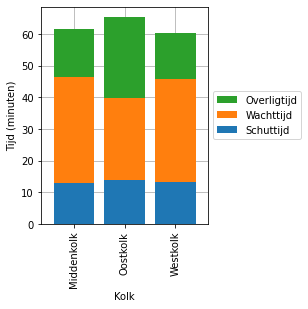

In [21]:
plotdata = (S[scenario].transit_times.groupby('Chamber')[['Waiting time [hours]',
       'Demurrage time [hours]',
       'Leveling time [hours]', ]].mean() *60)

plotdata.rename(columns={
    'Leveling time [hours]': 'Schuttijd',
    'Waiting time [hours]': 'Wachttijd',
    'Demurrage time [hours]': 'Overligtijd',
}, inplace=True)

plotdata[['Schuttijd', 'Wachttijd', 'Overligtijd']].plot.bar(stacked=True, figsize=(3,4), width=0.8, zorder=3)

plt.gca().legend(*map(reversed, plt.gca().get_legend_handles_labels()), loc='center left',
                         bbox_to_anchor=(1, 0.5))
plt.ylabel('Tijd (minuten)')
plt.grid()
plt.xlabel('Kolk')

plt.savefig(    outputdir / 'Passeertijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Passeertijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Passeertijd.csv')

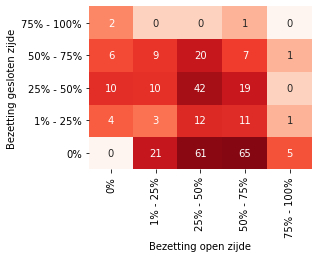

In [22]:
plotdata = S[scenario].utilization(n_bins=5)

f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(plotdata.T+ 1e-10, annot=True, fmt='.0f', cbar=False, vmax=100, vmin=0, norm=LogNorm(vmin=0.1, vmax=100), cmap='Reds')
plt.xlabel('Bezetting open zijde')
plt.ylabel('Bezetting gesloten zijde')
ax.invert_yaxis()

plt.savefig(    outputdir / 'Bezetting.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Bezetting.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Bezetting.csv')

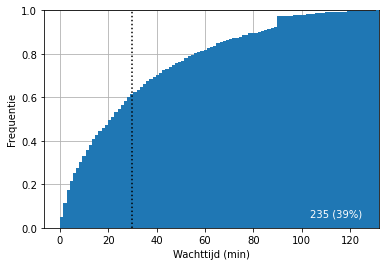

In [23]:
plotdata = S[scenario].transit_times['Waiting time [hours]']
plotdata = plotdata * 60

t_criterium = 30

plotdata.plot.hist(density=True, cumulative=True, bins=100, zorder=3)
plt.xlabel('Wachttijd (min)')
plt.axvline(t_criterium, c='k', ls=':', zorder=4)
plt.grid()
plt.ylabel('Frequentie')
plt.xlim(right=plotdata.max())
plt.ylim(0, 1)

n_above_criterium = (plotdata > t_criterium).sum() / S[scenario].replications
n_above_criterium_percentage = n_above_criterium / (plotdata.count() / S[scenario].replications)
plt.annotate(f'{n_above_criterium:.0f} ({n_above_criterium_percentage:.0%})', (0.95, 0.05), xycoords='axes fraction', ha='right', c='white')

plt.savefig(    outputdir / 'Wachttijd_verdeling.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Wachttijd_verdeling.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Wachttijd_verdeling.csv')

# Apply manual corrections

In [24]:
from copy import deepcopy

In [25]:
corrected = deepcopy(S[scenario])
corrected.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=1.5)
corrected.correction_leveling_without_utilization()

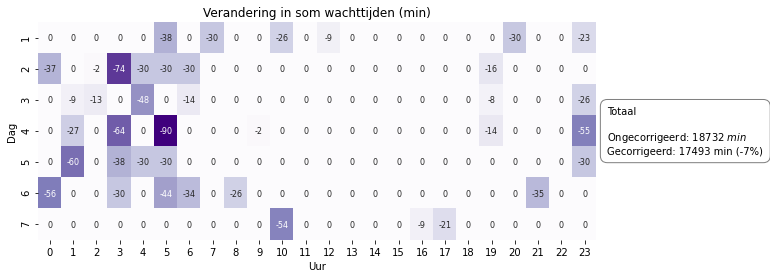

In [26]:
groupby_uncorrected = S[scenario].passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)
groupby_corrected = corrected.passage_time_per_hour_per_day_per_ship_sum(waiting_time=True).fillna(0).sum(axis=1).unstack().fillna(0)

plotdata = groupby_corrected - groupby_uncorrected
plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Passeer tijd (min)'}, cmap='Purples_r', annot=True, fmt='.0f', annot_kws={'size': 8})
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in som wachttijden (min)')

plt.annotate(
    "Totaal\n\nOngecorrigeerd: {:.0f} $min$\nGecorrigeerd: {:.0f} min ({:.0%})".format(
    groupby_uncorrected.sum().sum(),
    groupby_corrected.sum().sum(),
    (groupby_corrected.sum().sum() / groupby_uncorrected.sum().sum()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')


plt.savefig(    outputdir / 'Correctie_wachttijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_wachttijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_wachttijd.csv')

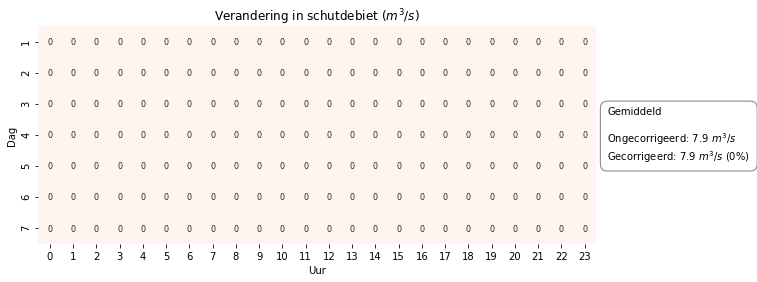

In [27]:
Q_corrected = corrected.waterloss_per_hour_per_day()
Q_uncorrected = S[scenario].waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Reds_r', annot=True, fmt='.0f', annot_kws={'size': 8}, vmin=-6, vmax=0)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:.0%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_schutdebiet.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_schutdebiet.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_schutdebiet.csv')

In [28]:
water_plane = {
    'Born':{
        'Westkolk': 136 * 16,
        'Middenkolk': 242*16,
        'Oostkolk': 154*16, 
        },
    'Maasbracht': {
        'Westkolk': 157 * 16,
        'Middenkolk': 157 * 16,
        'Oostkolk': 245 * 16
    },
    'Heel': {
        'Westkolk': 154*15.5,
        'Oostkolk': 246 * 13.5
    }
}

In [29]:
dH = {
    'Born': 11.35,
    'Maasbracht': 11.85,
    'Heel': 6.7
}

In [30]:
corrected_2 = deepcopy(corrected)
corrected_2.correction_waterloss(water_plane=water_plane[lock], dH=dH[lock], downward_leveling_side=1, correct_ship_volume=False)

In [31]:
corrected_3 = deepcopy(corrected)
corrected_3.correction_waterloss(water_plane=water_plane[lock], dH=dH[lock], downward_leveling_side=1, correct_ship_volume=True)

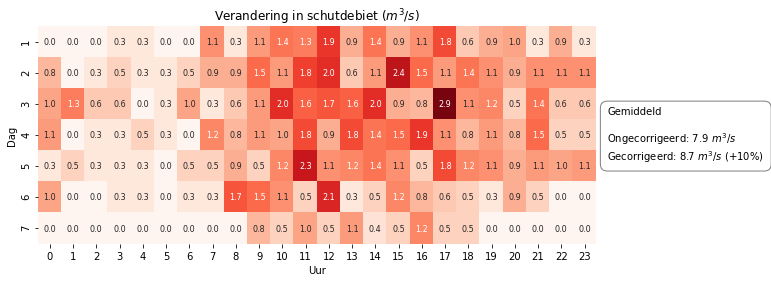

In [32]:
Q_corrected = corrected_2.waterloss_per_hour_per_day()
Q_uncorrected = corrected.waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='Reds', annot=True, fmt='.1f', annot_kws={'size': 8}, vmin=0, vmax=3)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:+.0%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_kolkoppervlak.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_kolkoppervlak.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_kolkoppervlak.csv')

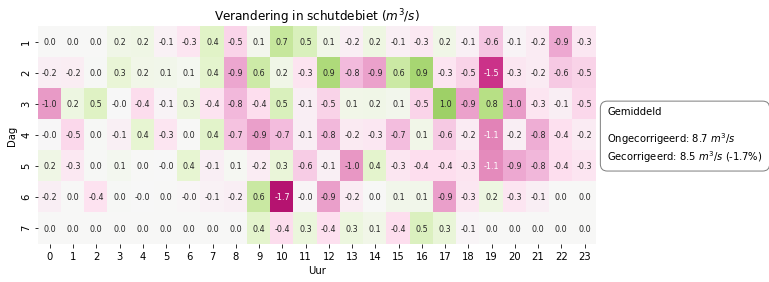

In [33]:
Q_corrected = corrected_3.waterloss_per_hour_per_day()
Q_uncorrected = corrected_2.waterloss_per_hour_per_day()

plotdata = Q_corrected - Q_uncorrected

plt.figure(figsize=(10, 4))
sns.heatmap(plotdata.T, cbar=False, cbar_kws={'label': 'Afvoer ($m^3/s$)'}, cmap='PiYG', annot=True, fmt='.1f', annot_kws={'size': 8}, vmin=-2, vmax=2)
plt.ylabel('Dag')
plt.xlabel('Uur')
plt.title('Verandering in schutdebiet ($m^3/s$)')

plt.annotate(
    "Gemiddeld\n\nOngecorrigeerd: {:.1f} $m^3/s$\nGecorrigeerd: {:.1f} $m^3/s$ ({:+.1%})".format(
    Q_uncorrected.mean().mean(),
    Q_corrected.mean().mean(),
    (Q_corrected.mean().mean() / Q_uncorrected.mean().mean()) - 1
    ), 
    bbox=dict(boxstyle="round, pad=0.7", fc="none", ec="gray"), 
    xy=(1.02,0.5), xycoords='axes fraction', annotation_clip=False, va='center')

plt.savefig(    outputdir / 'Correctie_scheepsvolume.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Correctie_scheepsvolume.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / 'Correctie_scheepsvolume.csv')

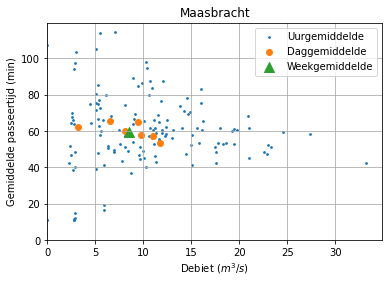

In [34]:
# Scatter per hour
T = corrected_3.passage_time_per_hour_per_day()
Q = corrected_3.waterloss_per_hour_per_day()

plt.scatter(Q.values, T.values, s=3, label='Uurgemiddelde')

# Scatter per day 
ships_per_hour = corrected_3.passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0) / T
ships_per_day = ships_per_hour.sum()

total_passage_time_per_day = corrected_3.passage_time_per_hour_per_day_per_ship_sum().fillna(0).sum(axis=1).unstack().fillna(0).sum()
mean_passage_time_per_day = total_passage_time_per_day / ships_per_day

mean_discharge_per_day = Q.mean().values

plt.scatter(mean_discharge_per_day, mean_passage_time_per_day, label='Daggemiddelde')

# Scatter per week
ships_per_week = ships_per_day.sum()
total_passage_time_per_week = total_passage_time_per_day.sum()

mean_passage_time_per_week = total_passage_time_per_week / ships_per_week
mean_discharge_per_week = Q.mean().mean()

plt.scatter(mean_discharge_per_week, mean_passage_time_per_week, marker='^', s=100, label='Weekgemiddelde')

plt.xlim(0)
plt.ylim(0)
plt.xlabel('Debiet ($m^3/s$)')
plt.ylabel('Gemiddelde passeertijd (min)')
plt.grid(c='#AAA')
plt.title(lock)
plt.legend()

plt.savefig(    outputdir / 'Debiet_passeertijd_peruur.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / 'Debiet_passeertijd_peruur.svg', bbox_inches='tight')